<a href="https://colab.research.google.com/github/UKJaagadhep/HacktoberFest23/blob/main/Machine%20Learning/Diabetes%20prediction/Diabetes%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Machine Learning: Logistic Regression**

## **Logistic Regression for Diabetes prediction**

**Import necessary libraries and modules**

In [ ]:
import pandas as p
import numpy as n
import matplotlib.pyplot as pl
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


**Creating a dataframe from diabetes data api csv**

In [ ]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names=["pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "diabetes_pedigree", "age", "outcome"]
data=pd.read_csv(url, names=column_names)
display(data)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


A person has diabetes if outcome is 1 and doesn't have diabetes if outcome is 0

We can use this for test data

In [ ]:
x=data.drop("outcome", axis=1)
y=data["outcome"]
display(x)


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
display(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: outcome, Length: 768, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)


**Standardizing**

In [ ]:
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit(x_train).transform(x_test)

**Logistic Regression and training the model**

In [ ]:
model=LogisticRegression(random_state=42)
model.fit(x_train, y_train)


LogisticRegression(random_state=42)

**Model evaluation and testing**

In [ ]:
y_predict=model.predict(x_test)
accuracy=accuracy_score(y_test, y_predict)
precision=precision_score(y_test, y_predict)
recall=recall_score(y_test, y_predict)
f1=f1_score(y_test, y_predict)

In [ ]:
#Evaluation metrics
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142858


**Model Visualization after evaluation**

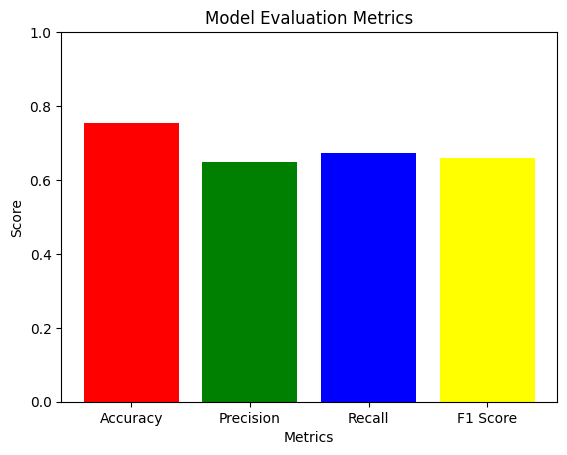

In [ ]:
metrics = [accuracy, precision, recall, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.bar(labels, metrics, color=['red','green','blue','yellow'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

**To predict if a person has diabetes based on given inputs by user**

In [ ]:
user_input=[]
for feature in column_names[:-1]:
    value = float(input(f"Enter {feature}: "))
    user_input.append(value)

user_input=np.array(user_input).reshape(1, -1)
user_input=scaler.transform(user_input)

prediction=model.predict(user_input)
if prediction[0]==1:
    print("Prediction: The person is likely to have diabetes.")
else:
    print("Prediction: The person is likely not to have diabetes.")

Enter pregnancies: 2
Enter glucose: 150
Enter blood_pressure: 70
Enter skin_thickness: 30
Enter insulin: 94
Enter bmi: 31.2
Enter diabetes_pedigree: 0.671
Enter age: 43
Prediction: The person is likely to have diabetes.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
